In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


In [7]:
df = pd.read_csv("/content/final_realistic_appliance_power_data.csv")

if 'Timestamp' in df.columns:
    df.drop(columns=['Timestamp'], inplace=True)

# Normalize the data for all appliance columns
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

In [8]:
def create_sequences(data, seq_length=24):
    x, y = [], []
    for i in range(len(data) - seq_length):
        x.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(x), np.array(y)

x, y = create_sequences(scaled_data, seq_length=24)


In [9]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.3, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=1/3, random_state=42)



In [10]:
model = Sequential()
model.add(LSTM(128, return_sequences=False, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dense(x_train.shape[2]))  # One output per appliance

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 128)            │        68,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 69,253 (270.52 KB)

 Trainable params: 69,253 (270.52 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
history = model.fit(
    x_train, y_train,
    validation_data=(x_val, y_val),
    epochs=50,
    batch_size=32,
    shuffle=False
)


Epoch 1/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0182 - val_loss: 0.0049
Epoch 2/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 34ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 3/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 11s 40ms/step - loss: 0.0032 - val_loss: 0.0033
Epoch 4/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - loss: 0.0028 - val_loss: 0.0030
Epoch 5/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 40ms/step - loss: 0.0025 - val_loss: 0.0028
Epoch 6/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0024 - val_loss: 0.0027
Epoch 7/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 8/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 36ms/step - loss: 0.0022 - val_loss: 0.0025
Epoch 9/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 9s 32ms/step - loss: 0.0022 - val_loss: 0.0024
Epoch 10/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 11/50
220/220 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - loss: 0.0021 - val_loss: 0.0024
Epoch 12/50
220/220 ━━━━━━━━━━━━━━━━━

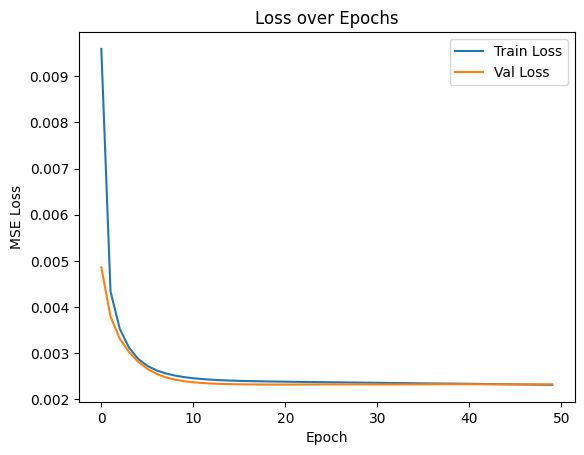

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0012
Test MSE: 0.001829913817346096


In [12]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Evaluate
mse = model.evaluate(x_test, y_test)
print(f"Test MSE: {mse}")


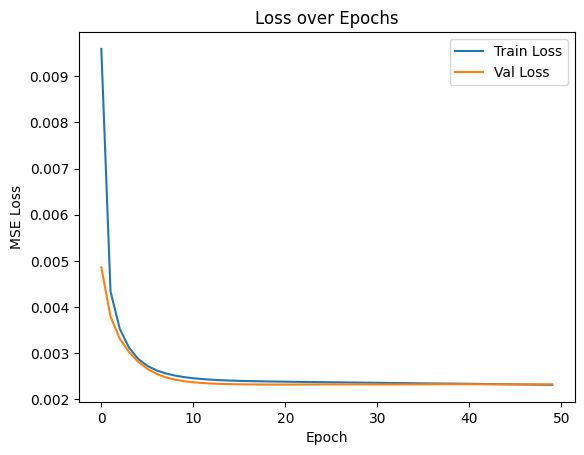

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0012
Test MSE: 0.001829913817346096
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


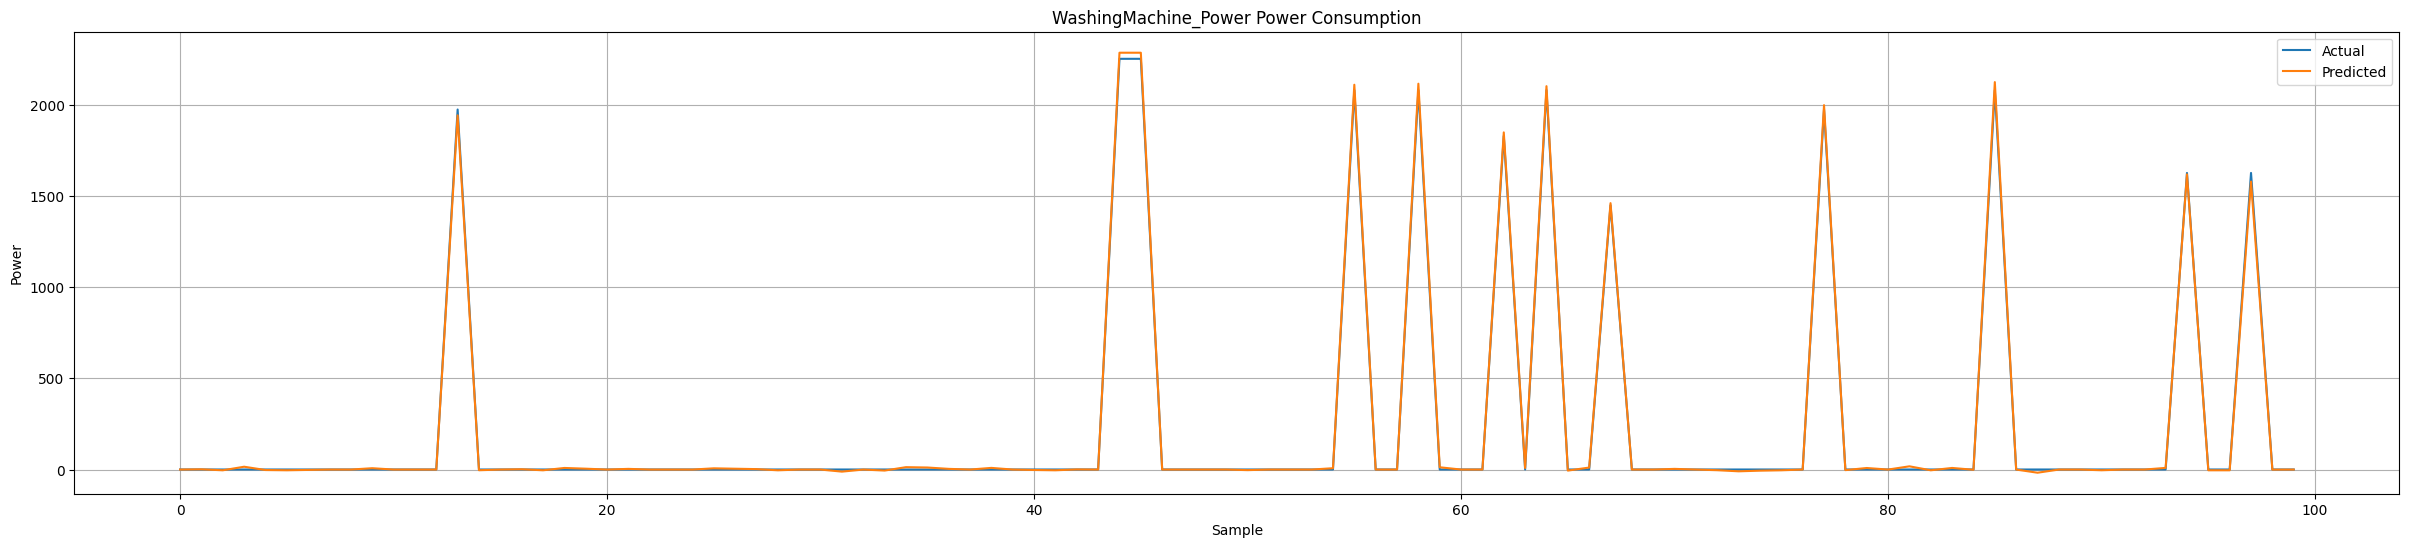

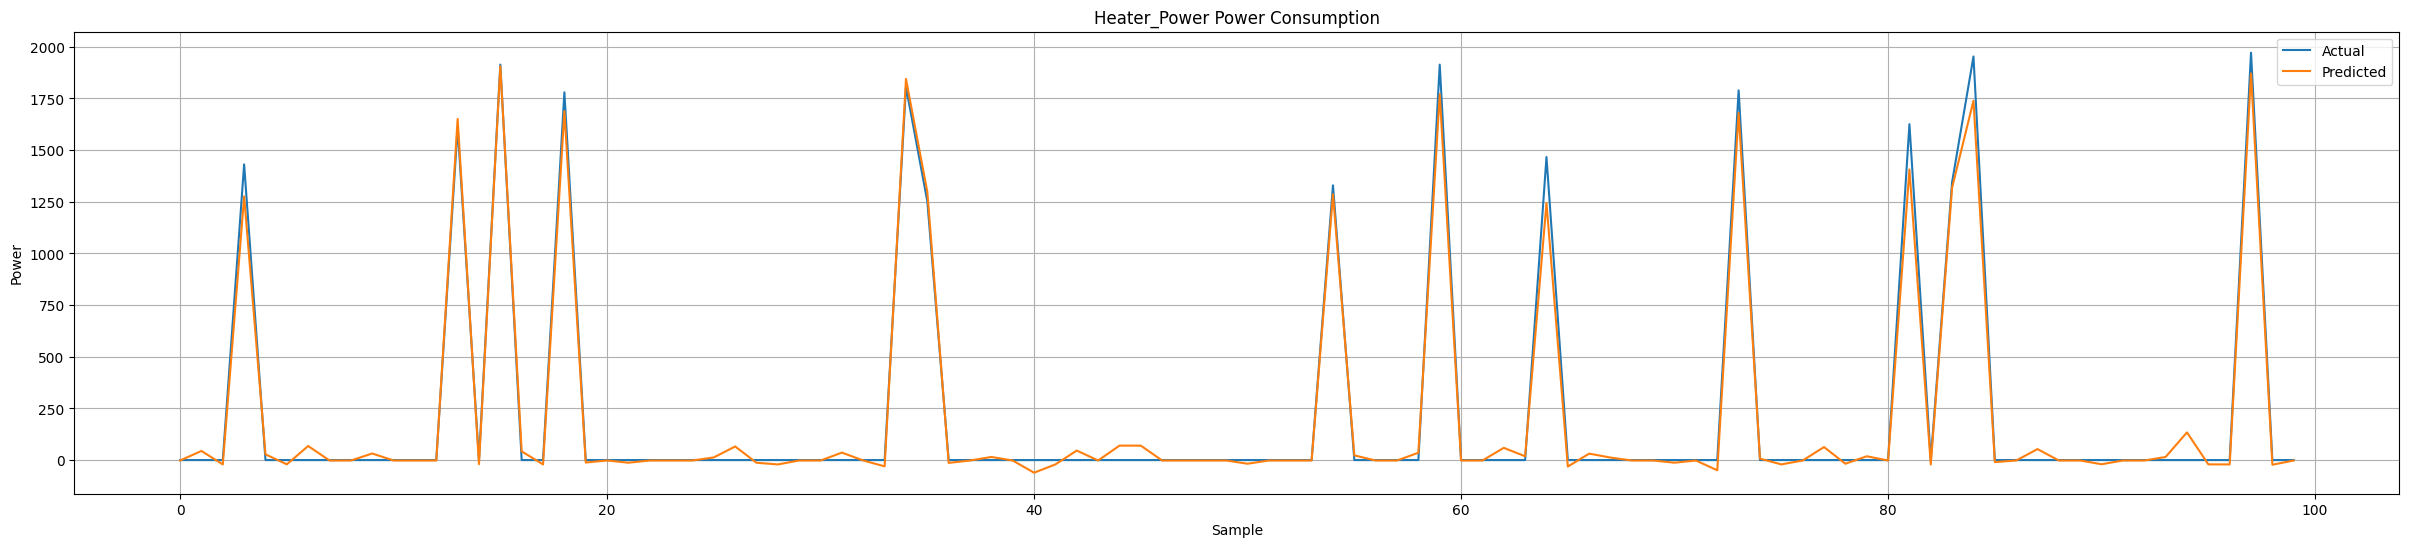

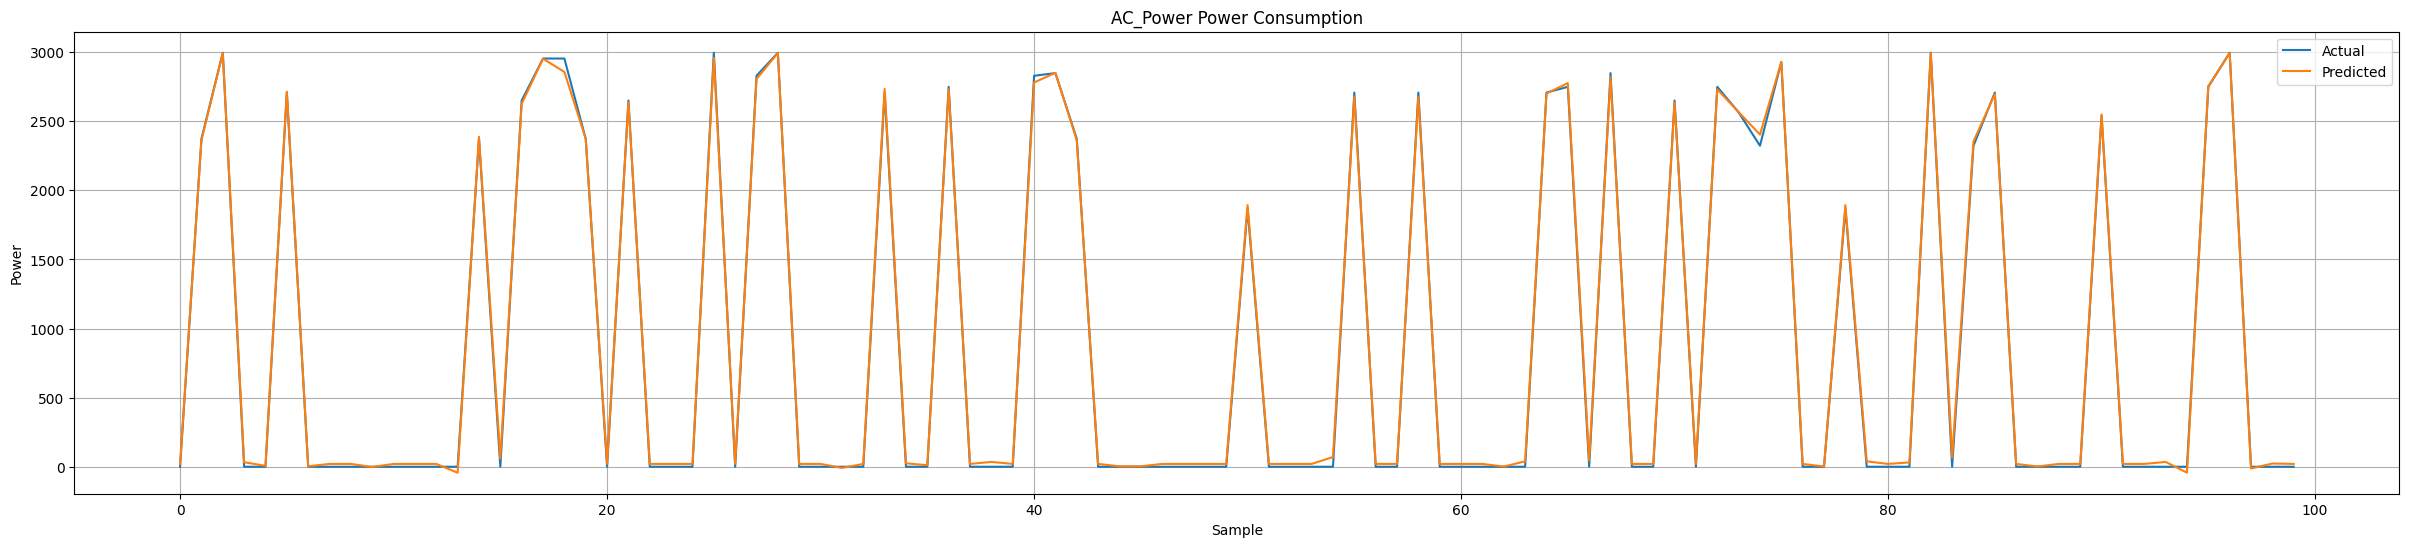

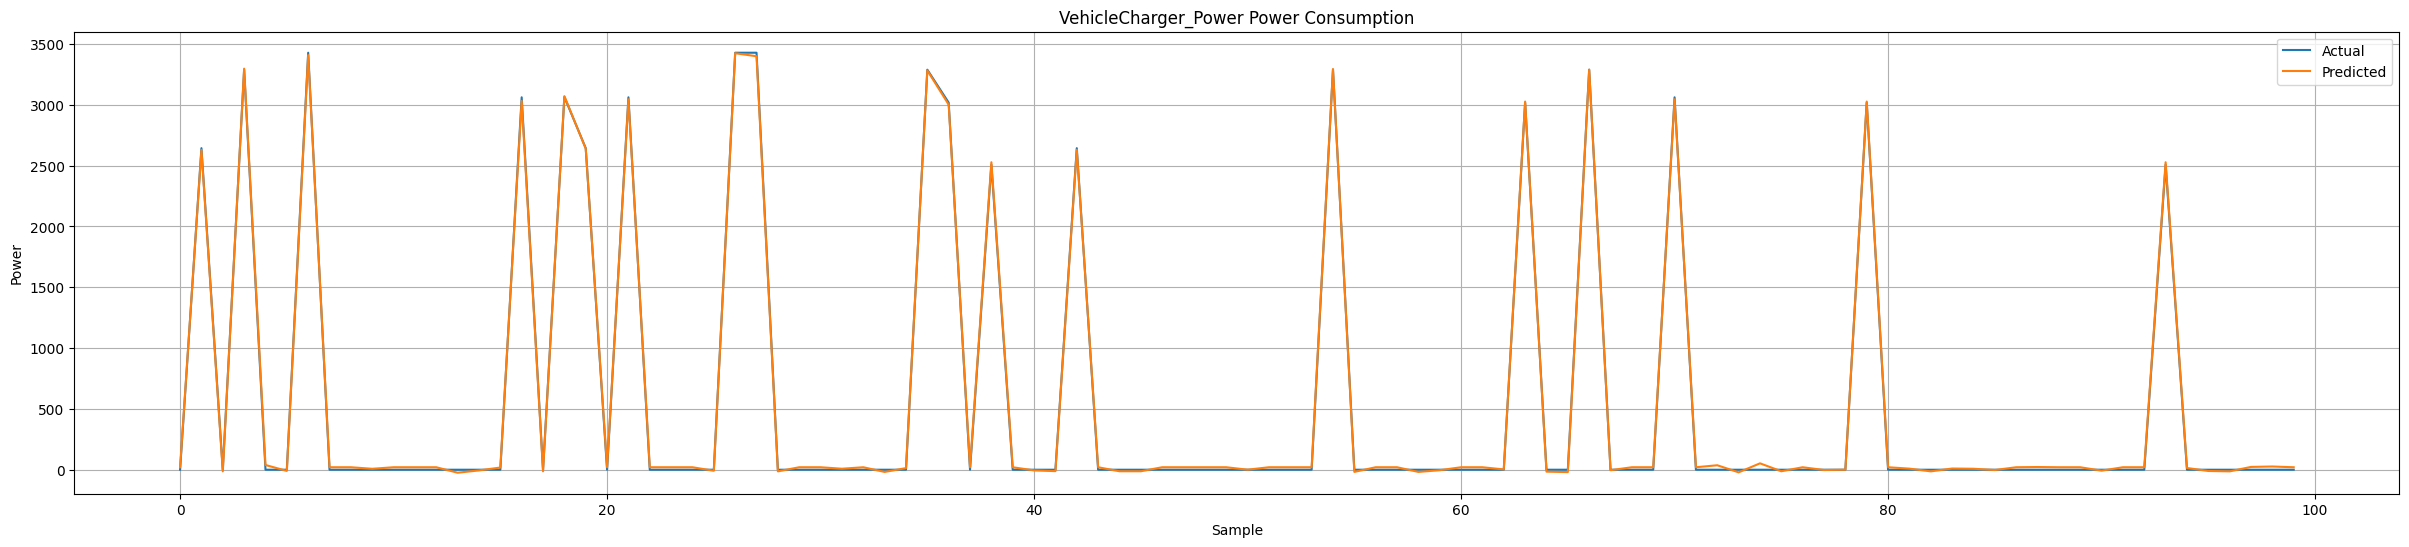

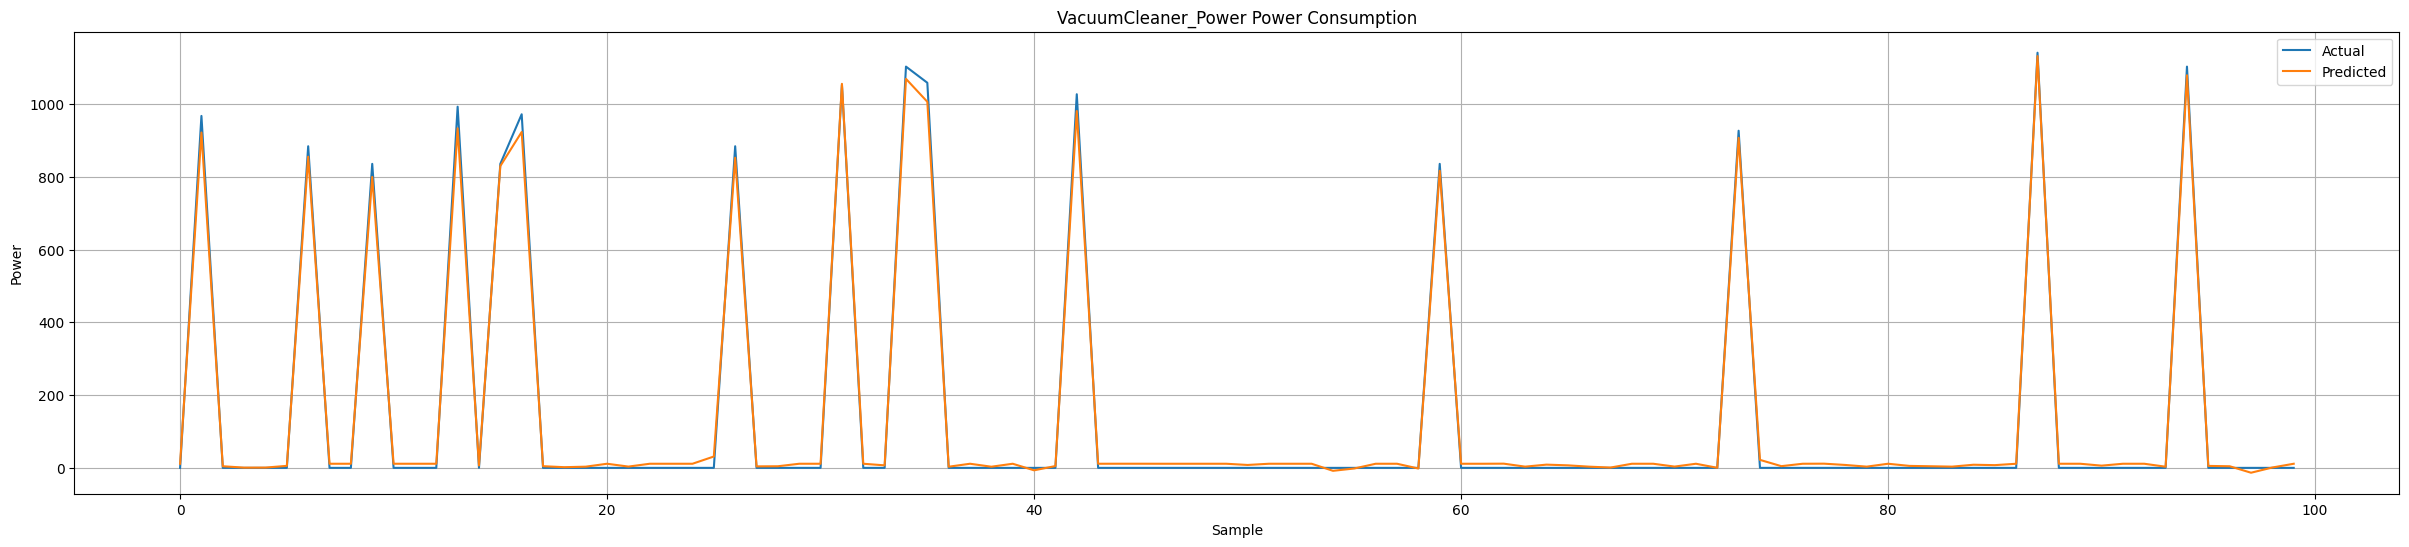

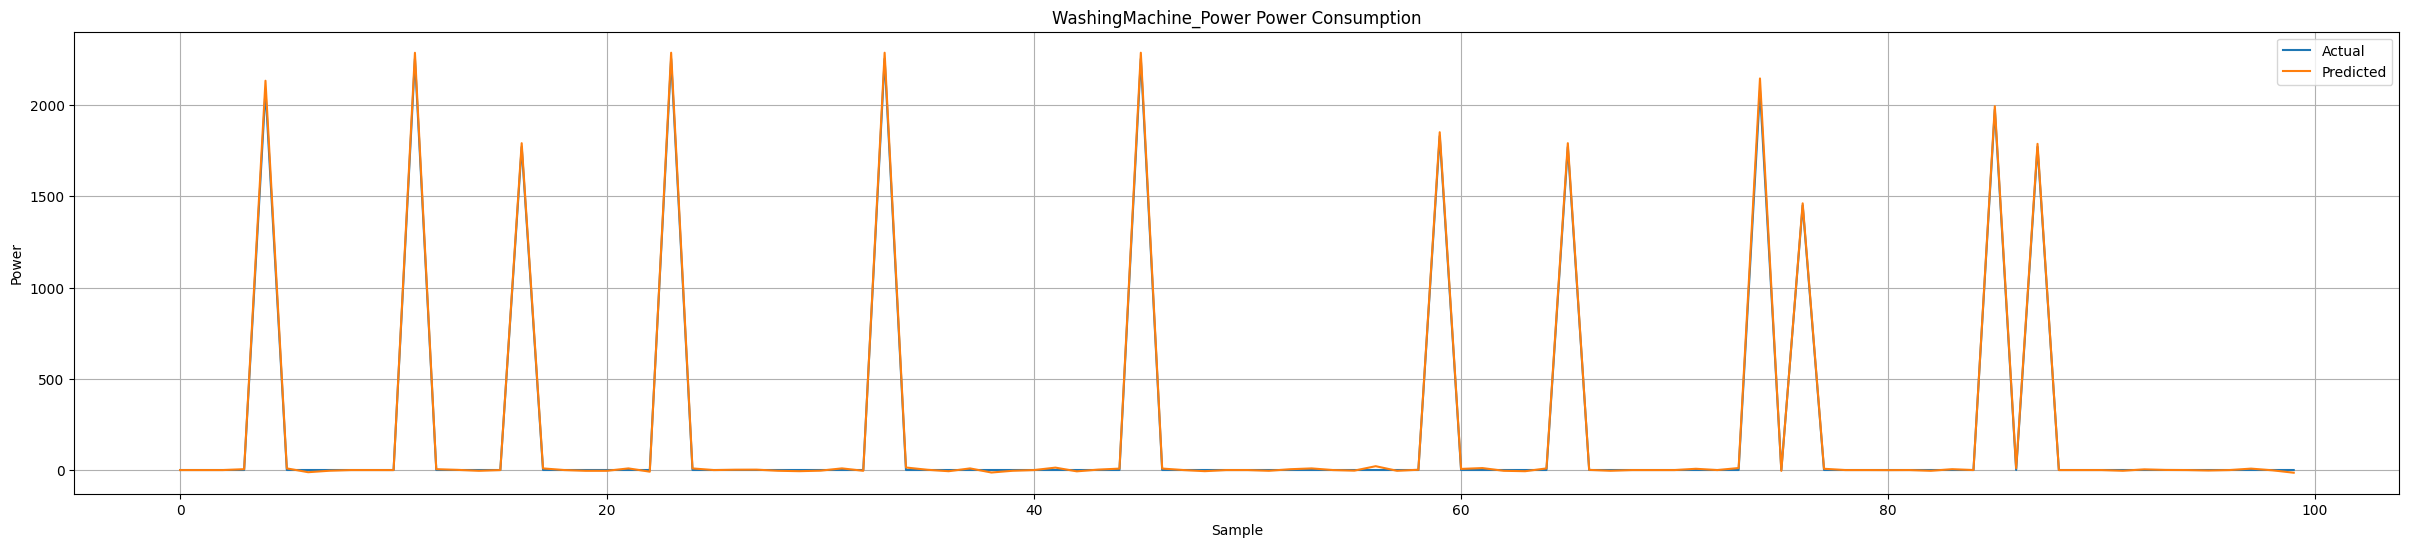

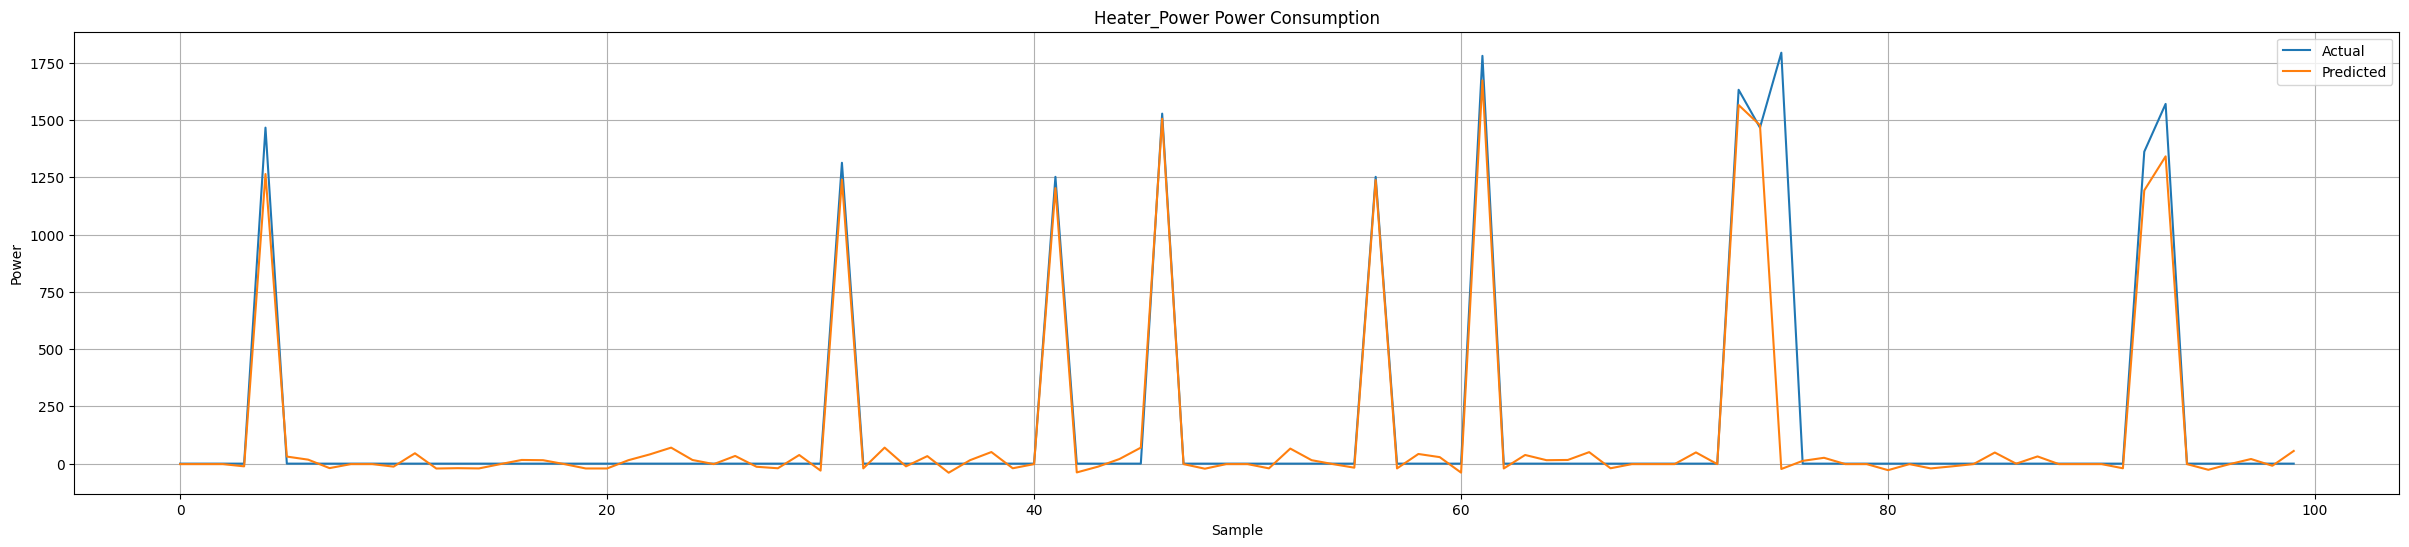

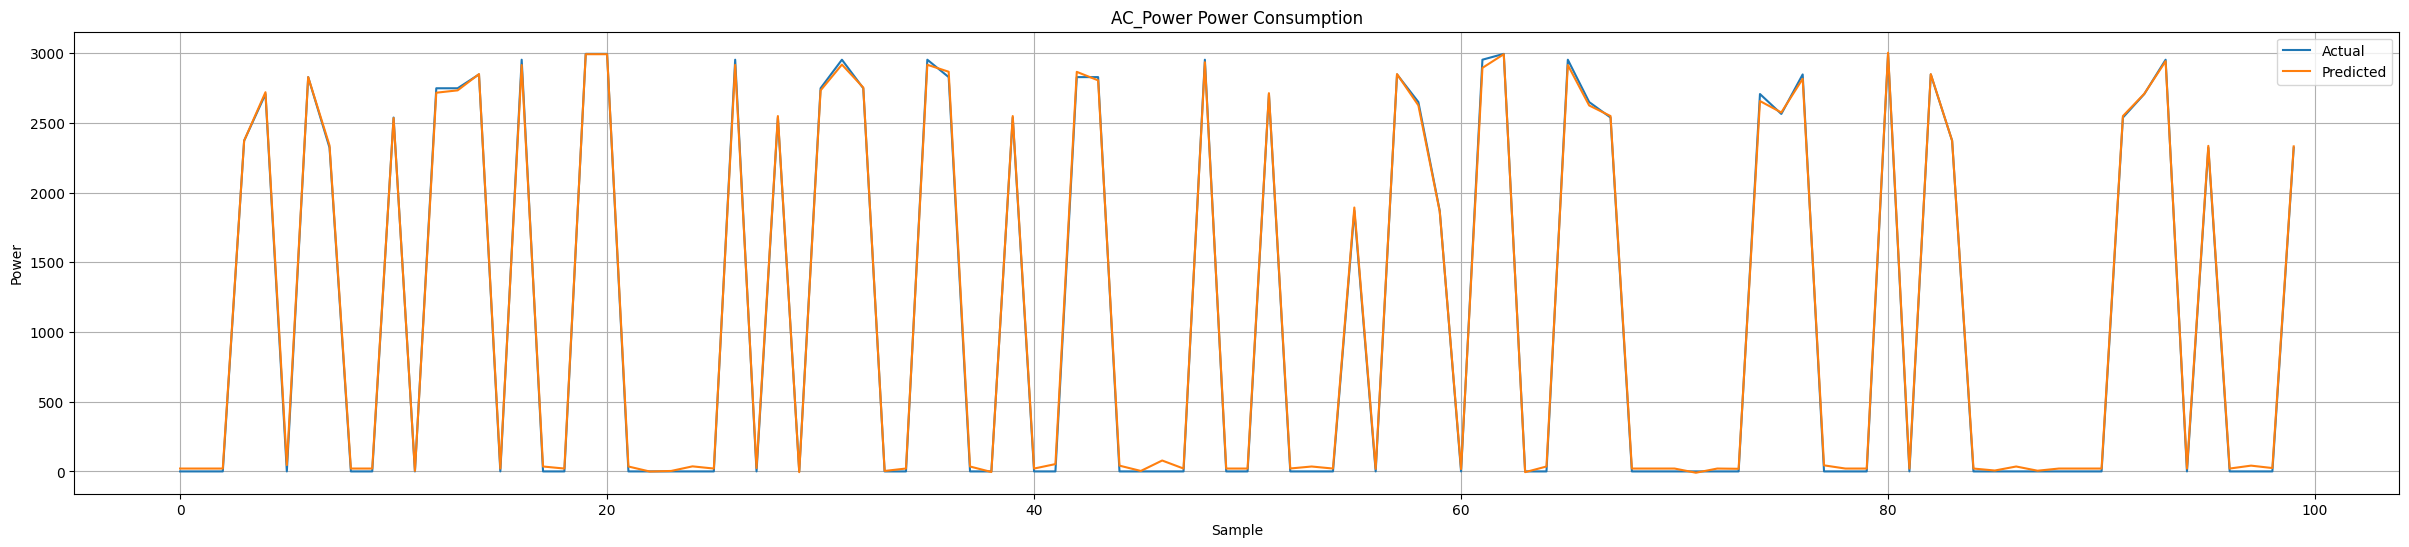

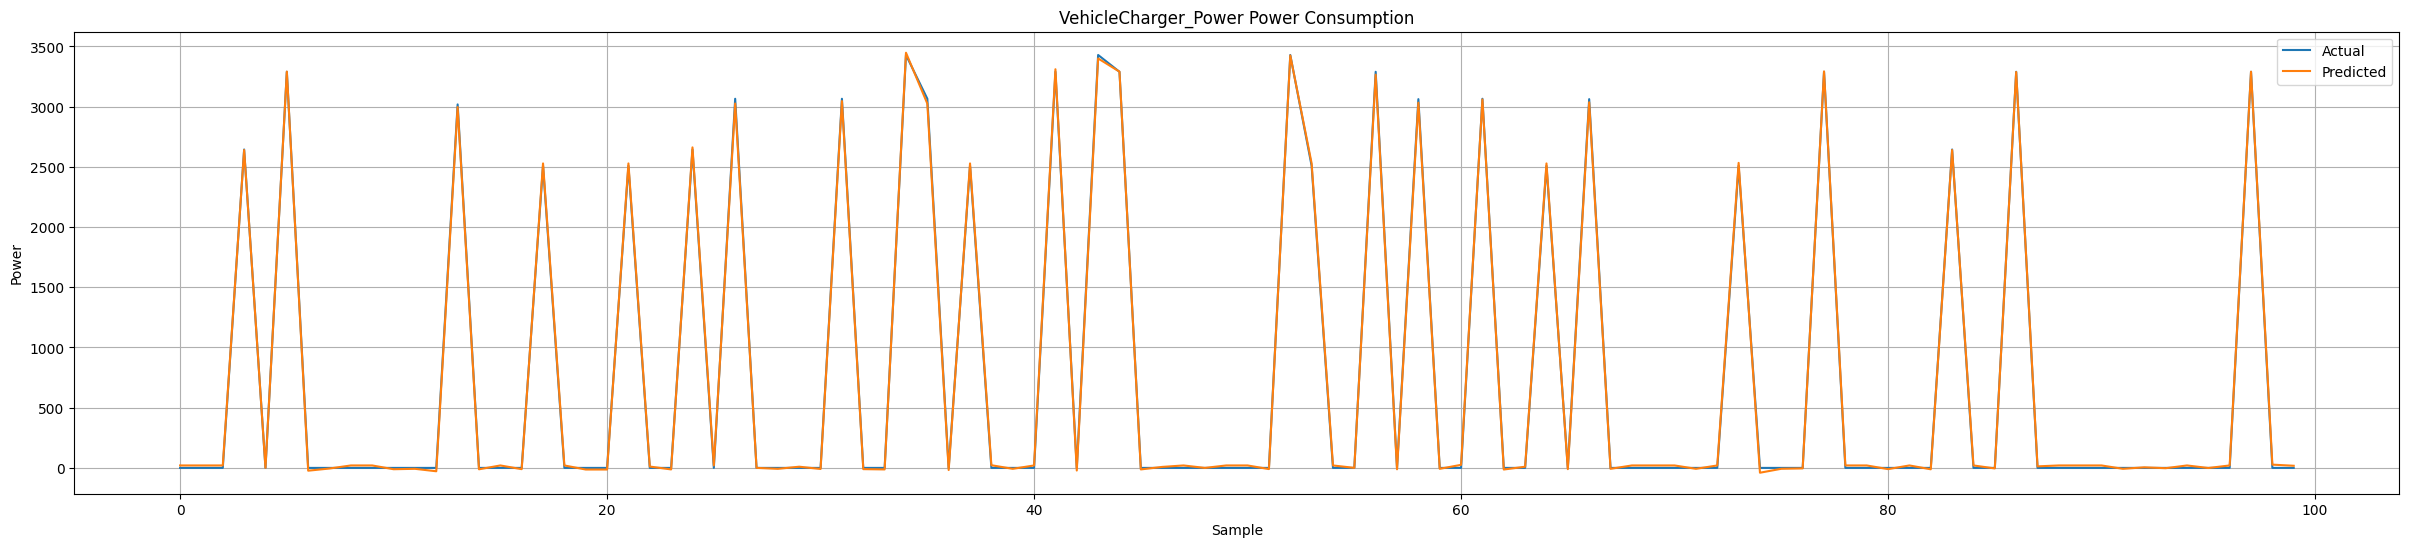

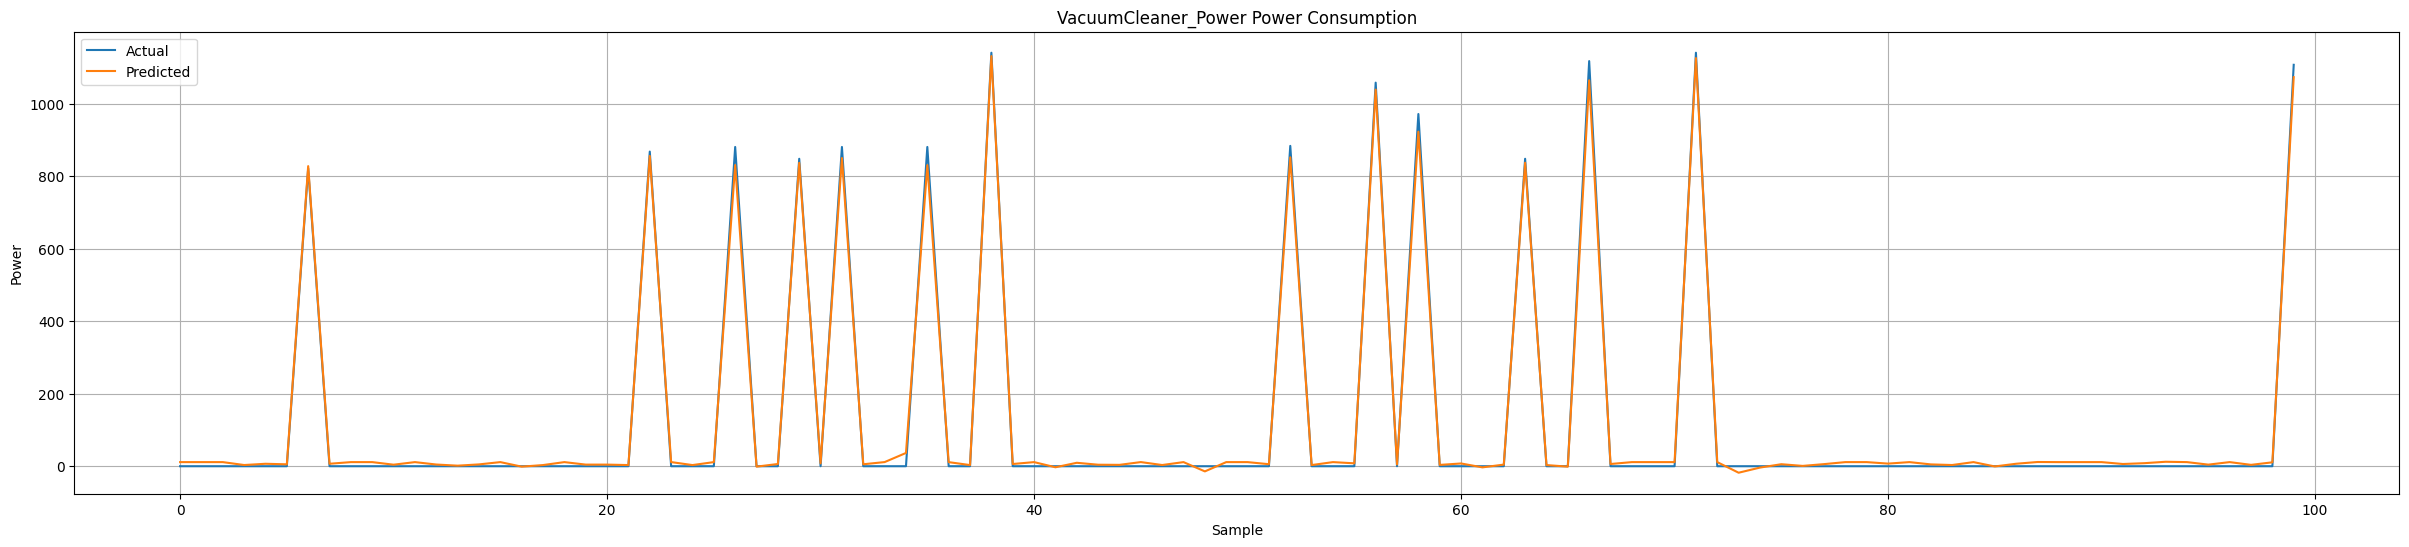

In [13]:
# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.show()

# Evaluate
mse = model.evaluate(x_test, y_test)
print(f"Test MSE: {mse}")

# Predict on the test set
y_pred = model.predict(x_test)


y_test_inv = scaler.inverse_transform(y_test)
y_pred_inv = scaler.inverse_transform(y_pred)

appliance_names = df.columns

for i in range(len(appliance_names)):
    plt.figure(figsize=(30, 6))
    plt.plot(y_test_inv[0:100, i], label='Actual')
    plt.plot(y_pred_inv[0:100, i], label='Predicted')
    plt.title(f"{appliance_names[i]} Power Consumption")
    plt.xlabel("Sample")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True)
    plt.show()

for i in range(len(appliance_names)):
    plt.figure(figsize=(30, 6))
    plt.plot(y_test_inv[200:300, i], label='Actual')
    plt.plot(y_pred_inv[200:300, i], label='Predicted')
    plt.title(f"{appliance_names[i]} Power Consumption")
    plt.xlabel("Sample")
    plt.ylabel("Power")
    plt.legend()
    plt.grid(True)
    plt.show()

In [44]:

model.save('my_lstm_model.h5')
model.save('my_lstm_model.keras')

In [15]:
import pickle

# Save the scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [16]:
from tensorflow.keras.models import load_model
import pickle

model = load_model('my_lstm_model.keras')
with open('scaler.pkl', 'rb') as f:
    scaler = pickle.load(f)

x_test_day = x_train[:5000]

# Predict for all sequences in the day at once
all_day_predictions_scaled = model.predict(x_test_day)

# Inverse transform if necessary
all_day_predictions = scaler.inverse_transform(all_day_predictions_scaled)

print("Predicted power consumption for all day:")
print(all_day_predictions)

appliance_names = df.columns
for i, prediction in enumerate(all_day_predictions):
    print(f"Time step {i+1}:")
    for j, appliance in enumerate(appliance_names):
        print(f"  {appliance}: {prediction[j]}")

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Streaming output truncated to the last 5000 lines.
  VehicleCharger_Power: -57.61766052246094
  VacuumCleaner_Power: -18.44012451171875
Time step 4168:
  WashingMachine_Power: -11.27601432800293
  Heater_Power: 46.791011810302734
  AC_Power: -4.971611499786377
  VehicleCharger_Power: 17.84718894958496
  VacuumCleaner_Power: 1042.865966796875
Time step 4169:
  WashingMachine_Power: 8.806551933288574
  Heater_Power: 15.054974555969238
  AC_Power: 35.17515563964844
  VehicleCharger_Power: 2528.37255859375
  VacuumCleaner_Power: 3.1784565448760986
Time step 4170:
  WashingMachine_Power: -0.3129523694515228
  Heater_Power: -2.076282024383545
  AC_Power: 20.547943115234375
  VehicleCharger_Power: 20.358800888061523
  VacuumCleaner_Power: 11.329686164855957
Time step 4171:
  WashingMachine_Power: -0.3129523694515228
  Heater_Power: -2.076282024383545
  AC_Power: 20.547943115234375
  VehicleCharger_Power: 20.358800888061523
  VacuumCleaner_Power: 11.329686164855957
Time step 4172:
  WashingMac

In [28]:
import numpy as np

def binarize_power_values(power_values, threshold_ratio=0.6):
    """
    Convert continuous power predictions to binary ON/OFF states based on dynamic threshold.

    Parameters:
    - power_values: List or np.array of predicted power values
    - threshold_ratio: Fraction of the max value to determine ON/OFF threshold

    Returns:
    - binary_states: List of 1s (ON) and 0s (OFF)
    """
    power_values = np.array(power_values)
    threshold = threshold_ratio * np.max(power_values)
    binary_states = (power_values >= threshold).astype(int)
    return binary_states

In [42]:
binary_average_states = {}

for appliance_name, avg_values in averages.items():
    # Set different threshold_ratio based on appliance name
    if appliance_name in ['WashingMachine_Power', 'Heater_Power', 'AC_Power']:
        threshold_ratio = 0.6
    else:
        threshold_ratio = 0.8

    binary_states = binarize_power_values(avg_values, threshold_ratio=threshold_ratio)
    binary_average_states[appliance_name] = binary_states

# Print the binarized states for the first few windows for each appliance
for appliance_name, binary_states in binary_average_states.items():
    print(f"--- {appliance_name} Binary States ---")
    print(binary_states[:24])

--- WashingMachine_Power Binary States ---
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1]
--- Heater_Power Binary States ---
[0 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1 1]
--- AC_Power Binary States ---
[0 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0]
--- VehicleCharger_Power Binary States ---
[0 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1]
--- VacuumCleaner_Power Binary States ---
[0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [37]:
with open('appliance_data.txt', 'w') as f:
    for appliance_name in appliance_names:
        f.write(f"--- {appliance_name} ---\n")
        f.write("States:\n")

        if appliance_name in states:
            np.savetxt(f, states[appliance_name].reshape(1, -1), fmt='%d', delimiter=', ')
        else:
            f.write("States data not available\n")

        f.write("Averages:\n")

        if appliance_name in averages:
            np.savetxt(f, averages[appliance_name].reshape(1, -1), fmt='%.4f', delimiter=', ')
        else:
            f.write("Averages data not available\n")

        f.write("Binary Average States:\n")

        if appliance_name in binary_average_states:
            np.savetxt(f, binary_average_states[appliance_name].reshape(1, -1), fmt='%d', delimiter=', ')
        else:
            f.write("Binary average states data not available\n")

        f.write("\n")

print("States, averages, and binary average states saved to appliance_data.txt")

States, averages, and binary average states saved to appliance_data.txt


In [43]:
file_path = '/content/appliance_data.txt'

try:
    with open(file_path, 'r') as f:
        file_content = f.read()
        print("Contents of the file:")
        print(file_content)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
except Exception as e:
    print(f"An error occurred: {e}")

Contents of the file:
--- WashingMachine_Power ---
States:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0
Averages:
97.5242, 176.0046, 92.3464, 209.8380, 67.0671, 115.1461, 180.5019, 107.7421, 139.2931, 202.8469, 176.7499, 98.6311, 141.3121, 86.7793, 232.1858, 183.1679, -0.5732, 161.7715, 167.9277, 369.3105, 166.1521, 215.8041, 139.8934, 255.5055
Binary Average States:
0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1

--- Heater_Power ---
States:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
Averages:
87.5466, 139.9944, 168.5318, 230.0565, 192.0813, 274.4982, 159.1284, 140.5824, 157.7587, 189.8233, 145.0188, 204.7267, 207.0175, 145.7202, 35.5051, 62.4228, 61.6243, 135.1797, 131.6617, 223.8135, 253.5751, 240.3299, 291.9064, 291.4353
Binary Average States:
0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1

--- AC_Power ---
States:
0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0